<a href="https://colab.research.google.com/github/OsvaldoUfla/calculo-pi-paralelo/blob/main/calculopiparalelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%writefile calculopiparalelo.cpp
#include <iostream>
#include <omp.h>
#include <iomanip>

using namespace std;

//long long num_passos = 1000000000;
double passo;

int main(int argc, char *argv[]){
   long long i;
   double x, pi, soma=0.0, time_inicio, time_fim;
   time_inicio = omp_get_wtime();
   long long num_passos = atoll(argv[1]);
   int nthreads = atoi(argv[2]);
   passo = 1.0/(double)num_passos;
	omp_set_num_threads(nthreads);

   #pragma omp parallel for	private(i,x) reduction(+:soma)
   for(i=0; i < num_passos; i++){
      x = (i + 0.5)*passo;
      soma = soma + 4.0/(1.0 + x*x);
   }

   pi = soma*passo;
   time_fim = omp_get_wtime();

   /*
   cout << "Tempo:" << setprecision(10) << fixed << time_fim - time_inicio << endl;
   cout << "O valor de PI é: " << pi << endl;
   */

   cout << setprecision(10) << fixed << time_fim - time_inicio;

   return 0;
}


Writing calculopiparalelo.cpp


In [ ]:
%%script bash
rm arq1*
g++  -fopenmp calculopiparalelo.cpp -o arq
pontoVirgula=";"
for n in 1000 10000 100000 1000000
do
  for nthreads in 1 2 4 8
   do
     echo $n >> arq$n
     echo $nthreads >> arq$n
     for  i in 1 2 3 4 5 6 7 8 9 10
      do
        ./arq $n $nthreads >>  arq$n

        if [ $i -lt 10 ]; then
          echo -n $(echo "$pontoVirgula" | tr -d '\n') >> arq$n
        fi

      done
    echo "" >> arq$n

  done
done




rm: cannot remove 'arq1*': No such file or directory


+------------------------+-------------------------+------------------------------+--------------------------------------+
|   Quantidade de Passos |   Quantidade de Threads |   Média de Tempo de Execução |   Desvio Padrão de Tempo de Execução |
+========================+=========================+==============================+======================================+
|                   1000 |                       1 |                 0.0000117692 |                         0.0000021825 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                   1000 |                       2 |                 0.0005033249 |                         0.0005629249 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                   1000 |                       4 |                 0.0001746653 |                         0.0000255889 |
+---------------

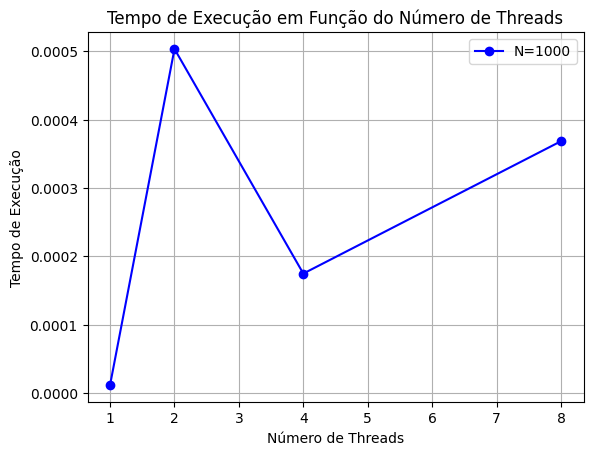

+------------------------+-------------------------+------------------------------+--------------------------------------+
|   Quantidade de Passos |   Quantidade de Threads |   Média de Tempo de Execução |   Desvio Padrão de Tempo de Execução |
+========================+=========================+==============================+======================================+
|                  10000 |                       1 |                 0.0000583797 |                         0.0000046972 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                  10000 |                       2 |                 0.0023324963 |                         0.0032199018 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                  10000 |                       4 |                 0.0002136897 |                         0.0000876391 |
+---------------

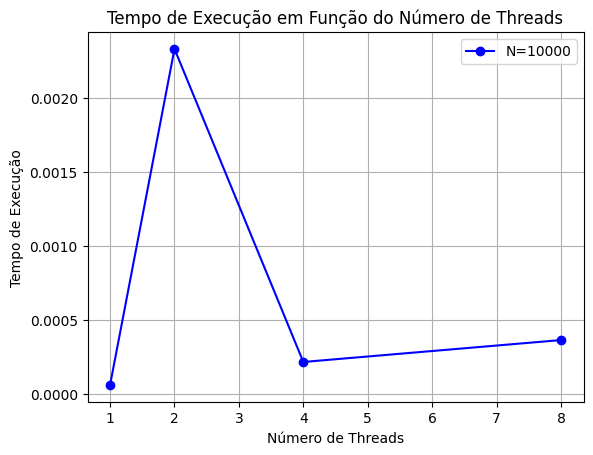

+------------------------+-------------------------+------------------------------+--------------------------------------+
|   Quantidade de Passos |   Quantidade de Threads |   Média de Tempo de Execução |   Desvio Padrão de Tempo de Execução |
+========================+=========================+==============================+======================================+
|                 100000 |                       1 |                 0.0004015529 |                         0.0000664390 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                 100000 |                       2 |                 0.0016810614 |                         0.0018669072 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                 100000 |                       4 |                 0.0006063900 |                         0.0001088462 |
+---------------

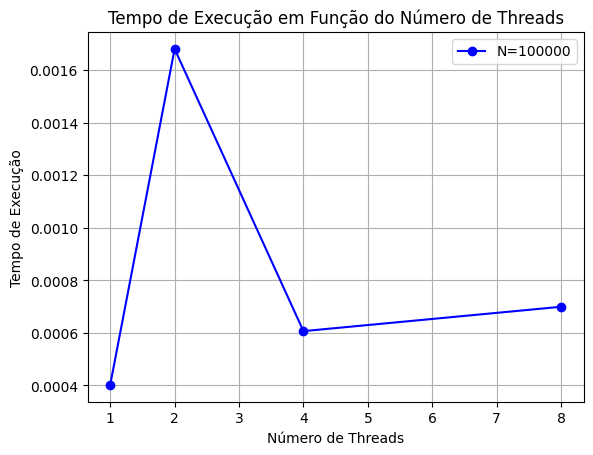

+------------------------+-------------------------+------------------------------+--------------------------------------+
|   Quantidade de Passos |   Quantidade de Threads |   Média de Tempo de Execução |   Desvio Padrão de Tempo de Execução |
+========================+=========================+==============================+======================================+
|                1000000 |                       1 |                 0.0039490651 |                         0.0008805749 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                1000000 |                       2 |                 0.0057506985 |                         0.0038189009 |
+------------------------+-------------------------+------------------------------+--------------------------------------+
|                1000000 |                       4 |                 0.0036895730 |                         0.0008905254 |
+---------------

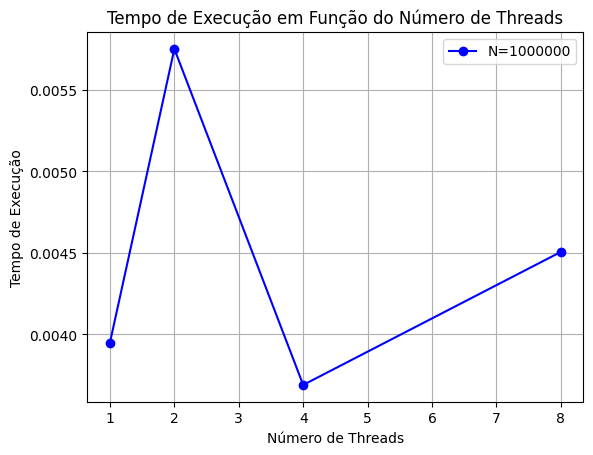

In [ ]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# Função para plotar o gráfico
def plotar_grafico(num_passos,num_threads, tempos_execucao):
    y = []
    for j in range(4):
        y.append(np.mean(tempos_execucao[j]))

    # Plotar o gráfico
    plt.plot(num_threads, y, marker='o', linestyle='-', color='b', label=f"N={num_passos[0]}")

    plt.xlabel('Número de Threads')
    plt.ylabel('Tempo de Execução')
    plt.title('Tempo de Execução em Função do Número de Threads')
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para ler os dados do arquivo
def ler_dados_arquivo(nome_arquivo):
    with open(nome_arquivo, 'r') as arquivo:
        linhas = arquivo.readlines()
        num_da_linha = 0
        num_passos = []   # Quantidade de passos
        num_threads = [] # Quantidade de threads
        tempos_execucao = [] # Tempos de execução
        for i in range(4):
            num_passos.append(int(linhas[num_da_linha].strip()))
            num_da_linha=num_da_linha+1
            num_threads.append(int(linhas[num_da_linha].strip()))
            num_da_linha=num_da_linha+1
            valores = linhas[num_da_linha].strip().split(';')
            num_da_linha=num_da_linha+1
            tempos_execucao.append([float(valor) for valor in valores])
    return num_passos, num_threads, tempos_execucao


# Função para exibir os resultados em uma tabela
def exibir_resultados(num_passos, num_threads, tempos_execucao):
    dados_tabela = [
        ["Quantidade de Passos", "Quantidade de Threads", "Média de Tempo de Execução", "Desvio Padrão de Tempo de Execução"],
        [num_passos[0], num_threads[0], np.mean(tempos_execucao[0]), np.std(tempos_execucao[0])],
        [num_passos[1], num_threads[1], np.mean(tempos_execucao[1]), np.std(tempos_execucao[1])],
        [num_passos[2], num_threads[2], np.mean(tempos_execucao[2]), np.std(tempos_execucao[2])],
        [num_passos[3], num_threads[3], np.mean(tempos_execucao[3]), np.std(tempos_execucao[3])]
    ]
    print(tabulate(dados_tabela, headers="firstrow", tablefmt="grid", floatfmt=".10f"))

for i in ["arq1000", "arq10000", "arq100000", "arq1000000"]:
    # Ler os dados do arquivo
    num_passos, num_threads, tempos_execucao = ler_dados_arquivo(i)
    # Exibir resultados
    exibir_resultados(num_passos, num_threads, tempos_execucao)
    plotar_grafico(num_passos,num_threads, tempos_execucao)

